## Imports

In [20]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

## Utils import

In [21]:
from utils import load_data2, encode_attributs_category, convert_to_tensor, pre_processing

## Préparation des données

In [22]:
# Load
train_data, test_data = load_data2()

# Suppresion des lignes avc valeurs manquantes
X_train, y_train, X_test, y_test = pre_processing(train_data, test_data)

# conversion des données catégorielles en numériques (one_hot_encoding)
X_train, y_train, X_test, y_test = encode_attributs_category(X_train, y_train, X_test, y_test)

X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = convert_to_tensor(X_train, y_train, X_test, y_test)

In [23]:
X_train_tensor.shape[1]

13

## Model

In [24]:
model = torch.nn.Sequential(
    torch.nn.Linear(X_train.shape[1], 8), # ! 13
    torch.nn.ReLU(),
    torch.nn.Linear(8, 2)
)

## Fonction de perte

In [25]:
loss_fn = torch.nn.CrossEntropyLoss()

lr = 1e-5 # Learning rate

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

0 tensor(22076.9453, grad_fn=<DivBackward1>)
1 tensor(23.8820, grad_fn=<DivBackward1>)
2 tensor(8.2723, grad_fn=<DivBackward1>)
3 tensor(6.8324, grad_fn=<DivBackward1>)
4 tensor(5.3703, grad_fn=<DivBackward1>)
5 tensor(4.0644, grad_fn=<DivBackward1>)
6 tensor(2.9016, grad_fn=<DivBackward1>)
7 tensor(2.2218, grad_fn=<DivBackward1>)
8 tensor(1.8381, grad_fn=<DivBackward1>)
9 tensor(1.5715, grad_fn=<DivBackward1>)


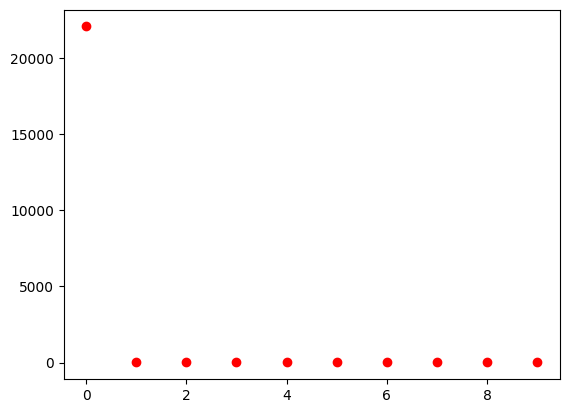

In [26]:
for t in range(10):
    # ! y_pred = forward_pass(x, W1, W2)
    y_pred = model(X_train_tensor)
    erreur = loss_fn(y_pred, y_train_tensor)

    erreur.backward()
    print(t, erreur)
    
    optimizer.step()

    plt.plot(t, erreur.item(), 'ro')